In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Brain tumor/T2-weighted (T2)/Data/BraTS2019_Features_T2.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Brain tumor/T2-weighted (T2)/Data/BraTS2020_Features_T2.csv')

In [ ]:
combined_df = pd.concat([df_2019,df_2020], ignore_index=True)
combined_df.head(5)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0d626982d543324835d14ee486ffc7880764d971,3D,"(1.0, 1.0, 1.0)",...,0.001062,7.569407,0.139726,1833.766912,0.299958,0.000997,2164.808592,0.044602,2.188652,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},38c3ae40fb7a1450d77caba707fe3e4581c7e349,3D,"(1.0, 1.0, 1.0)",...,0.002150,7.366549,0.137547,4951.234492,1.434197,0.000717,765.747297,0.079143,0.585173,HGG
2,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},262017bc775fd6dcda8235ebccffee0b807bf329,3D,"(1.0, 1.0, 1.0)",...,0.018775,7.089093,0.035320,29135.446481,2.315501,0.000830,164.756036,0.019788,0.269963,HGG
3,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},262a4ea878841bfdccb174083eeb7bb7251c3e44,3D,"(1.0, 1.0, 1.0)",...,0.022420,5.469345,0.329298,13.506001,0.183048,0.034952,135.445967,0.094622,4.214369,HGG
4,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ad0144997f041f0473d75ff260a73deaa5b2c86e,3D,"(1.0, 1.0, 1.0)",...,0.005133,6.705063,0.133131,1869.756272,3.901075,0.000645,300.276636,0.028993,0.208036,HGG


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 713.1+ KB


In [ ]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [ ]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [ ]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [ ]:
combined_df.info()
data = combined_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 619.9+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 619.9+ KB


In [ ]:
le=LabelEncoder()
y=le.fit_transform(data['Diagnosis'])

In [ ]:
# Split data into features (X) and labels (y)
X = data.drop('Diagnosis', axis=1).values
#y = data['Diagnosis'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [ ]:
class RGGN(tf.keras.Model):
    def __init__(self, num_classes):
        super(RGGN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense4 = tf.keras.layers.Dense(num_classes, activation='sigmoid')

    def call(self, inputs, training=False):
        x, adj_matrix = inputs
        h = self.dense1(x)
        h = tf.matmul(adj_matrix, h)  # Aggregation step using adjacency matrix
        return self.dense4(h)

# Create the RGGN model
num_classes = 2  # Two classes: 0 and 1
model = RGGN(num_classes)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training loop
epochs = 1000
for epoch in range(epochs):
    for batch_x, batch_y in train_dataset:
        inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))  # Identity matrix as adjacency matrix
        loss = train_step(inputs, batch_y)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

Epoch 1/1000, Loss: 0.7139678001403809
Epoch 2/1000, Loss: 0.578364372253418
Epoch 3/1000, Loss: 0.5038546919822693
Epoch 4/1000, Loss: 0.4657948911190033
Epoch 5/1000, Loss: 0.4438132047653198
Epoch 6/1000, Loss: 0.4257529377937317
Epoch 7/1000, Loss: 0.4087711572647095
Epoch 8/1000, Loss: 0.3930032551288605
Epoch 9/1000, Loss: 0.37809306383132935
Epoch 10/1000, Loss: 0.3642613887786865
Epoch 11/1000, Loss: 0.3516329824924469
Epoch 12/1000, Loss: 0.3407261371612549
Epoch 13/1000, Loss: 0.33043476939201355
Epoch 14/1000, Loss: 0.321372389793396
Epoch 15/1000, Loss: 0.3126210868358612
Epoch 16/1000, Loss: 0.3040603995323181
Epoch 17/1000, Loss: 0.296340674161911
Epoch 18/1000, Loss: 0.289111465215683
Epoch 19/1000, Loss: 0.2819845676422119
Epoch 20/1000, Loss: 0.27524107694625854
Epoch 21/1000, Loss: 0.2686260938644409
Epoch 22/1000, Loss: 0.2621442973613739
Epoch 23/1000, Loss: 0.2560397684574127
Epoch 24/1000, Loss: 0.24983395636081696
Epoch 25/1000, Loss: 0.2437811642885208
Epoch 26/

In [ ]:
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
for batch_x, batch_y in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    test_accuracy(batch_y, predictions)

print(f'Test Accuracy: {test_accuracy.result():.2f}')

Test Accuracy: 0.99


In [ ]:
y_pred = []
for batch_x, _ in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    y_pred.extend(predictions.numpy().argmax(axis=1))

y_test = np.array(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[111   0]
 [  2  28]]


In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

Specificity: 1.00


In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.97


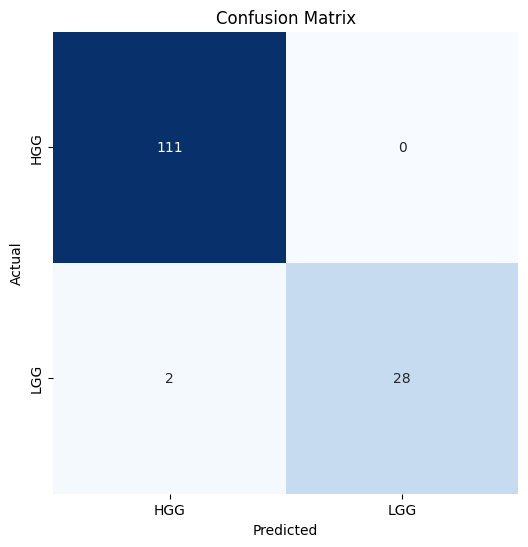

In [ ]:
# Assuming you have already calculated the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['HGG', 'LGG'],
            yticklabels=['HGG', 'LGG'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       1.00      0.93      0.97        30

    accuracy                           0.99       141
   macro avg       0.99      0.97      0.98       141
weighted avg       0.99      0.99      0.99       141



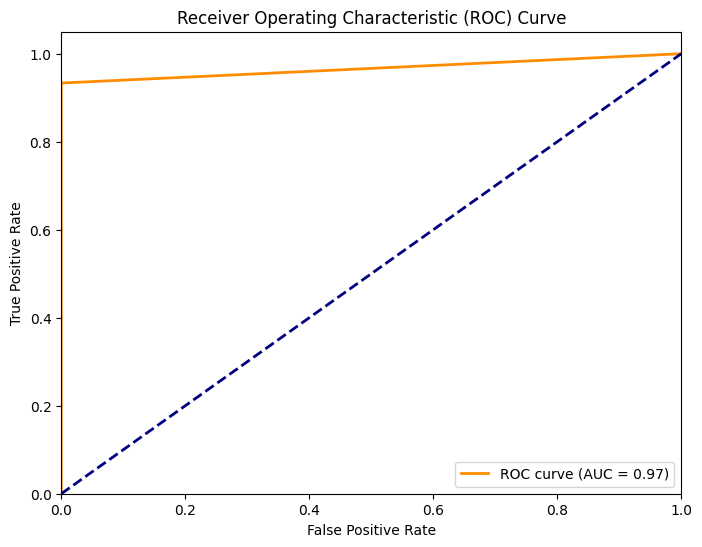

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Create and display the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()